# Logistic regression en k-means clustering

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Van regressie naar kansrekenen

- Lineaire regressie produceert een continue waarde
$$
    \hat{y} = \hat{\beta_0} + \hat{\beta_1} x_1 + \hat{\beta_2} x_2 + \dots + \hat{\beta_d} x_d
$$

- Met domein $\hat{y} \in (-\infty, +\infty)$

- Gegeven een binair classificatie probleem met classes $C_1$ en $C_2$
- Wat is $P(C_1 | \mathbf{x})$?
- Kansen liggen in het domein $[0, 1]$

Hoe gaan we van $\hat{y} \in (-\infty, +\infty)$ naar $P(C_1 | \mathbf{x}) \in [0, 1]$?

## Wat zijn de ODDS?
- Ratio tussen $P(C_1 | \mathbf{x})$ en $P(C_2 | \mathbf{x})$
$$
    ODDS = \dfrac{P(C_1 | \mathbf{x})}{1 - P(C_1 | \mathbf{x})} = \dfrac{P(C_1 | \mathbf{x})}{P(C_2 | \mathbf{x})}
$$
- Andere woorden: ratio tussen kans op positief/true/1 en negatief/false/0
- Ratio tussen hoevaak iets **wel** heeft voorgedaan en hoevaak iets **niet** heeft voorgedaan. 
- e.g., "The odds of rolling a 6 is 1 to 5 (abbreviated 1:5)."
\begin{align*}
    ODDS_{\text{6 gooien}} &= \dfrac{P(\text{6 gooien})}{1-P(\text{6 gooien})} = \dfrac{1/6}{1-(1/6)} = 1/5\\[2em]
    P(\text{6 gooien}) &= \dfrac{ODDS}{1+ODDS} = \dfrac{1/5}{1+(1/5)} = 1/6
\end{align*}

In [2]:
kans_op_succes = 0.8
odds = kans_op_succes/(1-kans_op_succes)
odds # 4x meer waarschijnlijk op succes

4.000000000000001

## Log ODDS (Logit)

Neem logaritme van ODDS:
$$
    \text{logit}(x) = \log \left(\dfrac{x}{1-x}\right)
$$
Input: kanswaarde
 
Output: waarschijnlijkheid als numerieke waarde

Waarom log odds (logit)?
- Odds gedefinieerd op het domein $(0, +\infty)$
- Log odds gedefinieerd op het domein $(-\infty, +\infty)$
- Interpreteer $\hat{y} \in (-\infty, +\infty)$ als $\hat{y} = \text{logit}(P(C_1 | \mathbf{x}))$

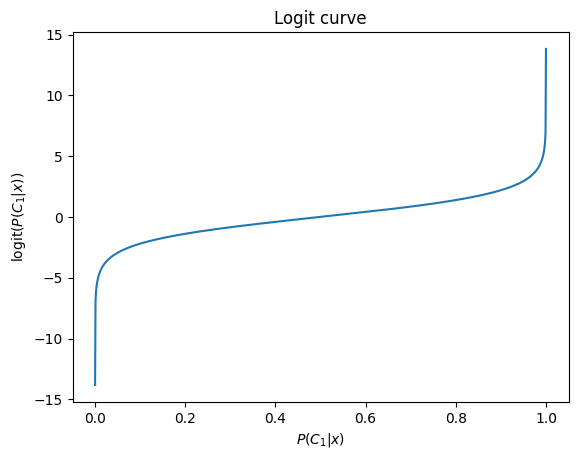

In [3]:
def logit(x: np.ndarray):
    return np.log(x/(1-x))

X_range = np.linspace(1e-6, 1-1e-6, 1000)
logits = logit(X_range)

sns.lineplot(x=X_range, y=logits)
plt.title("Logit curve")
plt.xlabel(r"$P(C_1 | x)$")
plt.ylabel(r"$\text{logit}(P(C_1 | x))$")
plt.show()

## Logistic Regression

Als we $\hat{y}$ interpreteren als de logit (log ODDS) van $P(C_1 | \mathbf{x})$, dan krijgen we:
$$
    \hat{y} = \log \left(\dfrac{P(C_1 | \mathbf{x})}{1-P(C_1 | \mathbf{x})}\right)
$$
Druk de vergelijking uit in termen van $P(C_1 | \mathbf{x})$ (oefening: reken zelf na)
\begin{align*}
    P(C_1 | \mathbf{x}) &= \dfrac{1}{1+e^{-\hat{y}}}\\
    P(C_1 | \mathbf{x}) &= \dfrac{1}{1+e^{-(\hat{\beta_0} + \hat{\beta_1} x_1 + \hat{\beta_2} x_2 + \dots + \hat{\beta_d} x_d)}}
\end{align*}

Deze vorm is de inverse van **logit** en heet de **logistic function** of de **sigmoid function**.
$$
    \text{sigmoid}(x) = \dfrac{1}{1+e^{-x}}
$$

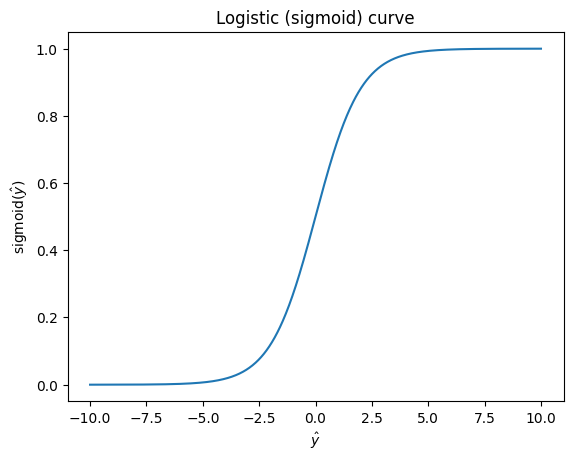

In [4]:
def sigmoid(x: np.ndarray):
    return 1/(1+np.exp(-x))

X_range = np.linspace(-10, 10, 1000)
y = sigmoid(X_range)

sns.lineplot(x=X_range, y=y)
plt.title("Logistic (sigmoid) curve")
plt.xlabel(r"$\hat{y}$")
plt.ylabel(r"$\text{sigmoid}(\hat{y})$")
plt.show()

- Lineaire regressie is een lineaire transformatie van de input features $(x_1, x_2, \dots, x_d)$
- Sigmoid voegt een niet-lineaire transformatie toe 
- Lijkt verassend veel op één neuron (perceptron) in een neuraal netwerk

## Example 1: linear regression classification

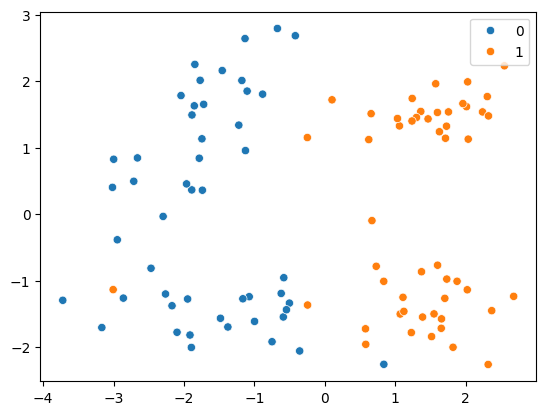

In [11]:
from sklearn.datasets import make_classification

X, Y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    class_sep=1.5
)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y)
plt.show()

Lineaire regressie toepassen op een classificatieprobleem:
- $\hat{y}$ ligt niet precies in het domein $[0, 1]$
- Beslissingen maken kan wel nog met
$$
    \mathbf{x} \in C_1 = \begin{cases} \text{true} & \text{if } \hat{y} > 0.5\\ \text{false} & \text{otherwise} \end{cases}
$$

In [12]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X, Y)

y_hat = linreg.predict(X)

acc = np.sum((y_hat > 0.5) == Y) / len(Y)

print(f"{acc=}")

acc=0.96


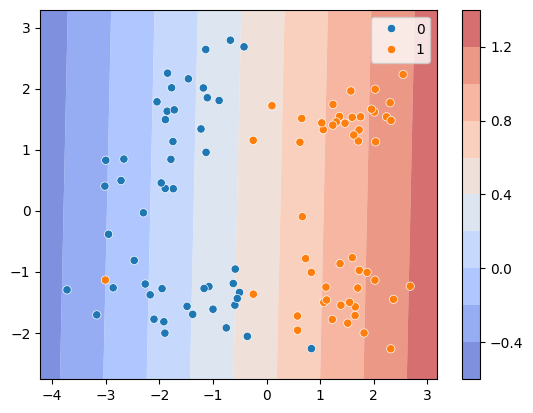

In [13]:
# create cartesian product
xmin = X[:, 0].min(); xmax = X[:, 0].max()
ymin = X[:, 1].min(); ymax = X[:, 1].max()
xx, yy = np.meshgrid(
    np.linspace(xmin-.5, xmax+.5, 100),
    np.linspace(ymin-.5, ymax+.5, 100)
)
D = np.array([xx.ravel(), yy.ravel()]).T

# predict decision plane
y_hat_boundary = linreg.predict(D)

contf = plt.contourf(xx, yy, y_hat_boundary.reshape(xx.shape), 10, cmap='coolwarm', alpha=0.7, antialiased=True)
colorbar = plt.colorbar(contf)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y)
plt.show()

## Example 2: logistic regression 

((400, 2), (100, 2), (400,), (100,))

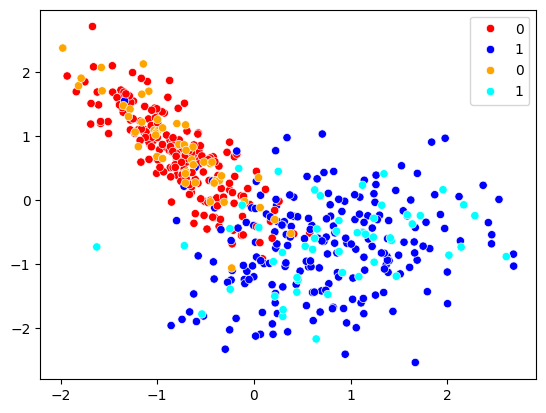

In [15]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# create synthetic dataset
X, Y = make_classification(
    n_samples=500, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0, 
    n_repeated=0, 
    n_classes=2,
    n_clusters_per_class=1,
    class_sep=1.2
)

# normalize so that mean is zero and unit variance
X = (X - X.mean(axis=0))/X.std(axis=0)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, stratify=Y)

sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette=['r', 'b'])
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette=['orange', 'cyan'])

X_train.shape, X_test.shape, y_train.shape, y_test.shape

Lineaire regressie is fijn want er is een **closed-form oplossing** om de waardes voor de $\beta$ coefficienten te vinden
$$
    \hat{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$
Er is echter **geen** closed form oplossing voor logistic regression.

We moeten dus een iteratieve optimalisatie methode gebruiken, zoals **Gradient Descent**.

De loss functie is nu niet meer **MSE** maar de **Cross-Entropy** loss
$$
    L = - \sum_i^{N} y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i) 
$$

De update rules voor de $\beta$ coefficienten zijn dan:
\begin{align*}
    \hat{\beta}_0 &:= \hat{\beta}_0 + \text{lr} \sum_j (y_j - \hat{y}_j)\\
    \hat{\beta}_i &:= \hat{\beta}_i + \text{lr} \sum_j (y_j - \hat{y}_j) X_{ji}
\end{align*}
Waarbij:
- $\text{lr}$ een instelbare **learning rate** is (controleert hoeveel per stap geleerd wordt)
- $\sum_j (y_j - \hat{y}_j)$ is de afgeleide van $L$ met betrekking tot $\hat{\beta}_0$
- $\sum_j (y_j - \hat{y}_j) X_ij$ is de afgeleide van $L$ met betrekking tot $\hat{\beta}_i$

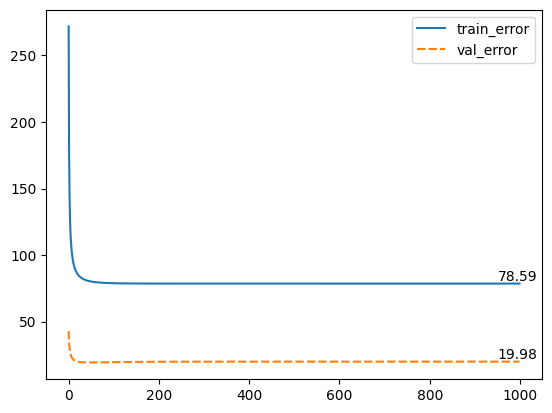

In [19]:
sigmoid = lambda y: 1/(1+np.exp(-y))

# parameters initialised uniformly
b = np.random.uniform(-0.3, 0.3, size=(2, 1))
b0 = np.random.uniform(-0.3, 0.3, size=(1, 1))

# learning rate
lr = 0.003
# number of training epochs
EPOCHS = 1000

# target
y_trn = y_train[..., None] # shape (N,) --> (N, 1)
y_val = y_test[..., None]  # shape (N,) --> (N, 1)

history = []

for _ in range(EPOCHS):
    # logistic regression formula
    y_pred = sigmoid(b0 + X_train @ b)
    
    # cross entropy error
    train_error = -np.sum(y_trn * np.log(y_pred) + (1-y_trn) * np.log(1-y_pred))

    # update via gradient descent
    for i in range(b.shape[0]):
        b[i] += lr * np.sum((y_trn - y_pred) * X_train[:, i, None])

    b0 += lr * np.sum((y_trn - y_pred))

    # validation error
    val_pred = sigmoid(b0 + X_test @ b)
    val_error = -np.sum(y_val * np.log(val_pred) + (1-y_val) * np.log(1-val_pred))

    history.append([train_error, val_error])
    # print(train_error, val_error)

history = pd.DataFrame(history, columns=["train_error", "val_error"])

last_train_error = history.iloc[-1, 0]
last_val_error = history.iloc[-1, 1]

ax = sns.lineplot(history)
ax.text(EPOCHS-50, last_train_error+2, f"{last_train_error:.2f}")
ax.text(EPOCHS-50, last_val_error+2, f"{last_val_error:.2f}")
plt.show()

In [20]:
# create cartesian product
xmin = X[:, 0].min(); xmax = X[:, 0].max()
ymin = X[:, 1].min(); ymax = X[:, 1].max()
xx, yy = np.meshgrid(
    np.linspace(xmin-.5, xmax+.5, 100),
    np.linspace(ymin-.5, ymax+.5, 100)
)
D = np.array([xx.ravel(), yy.ravel()]).T

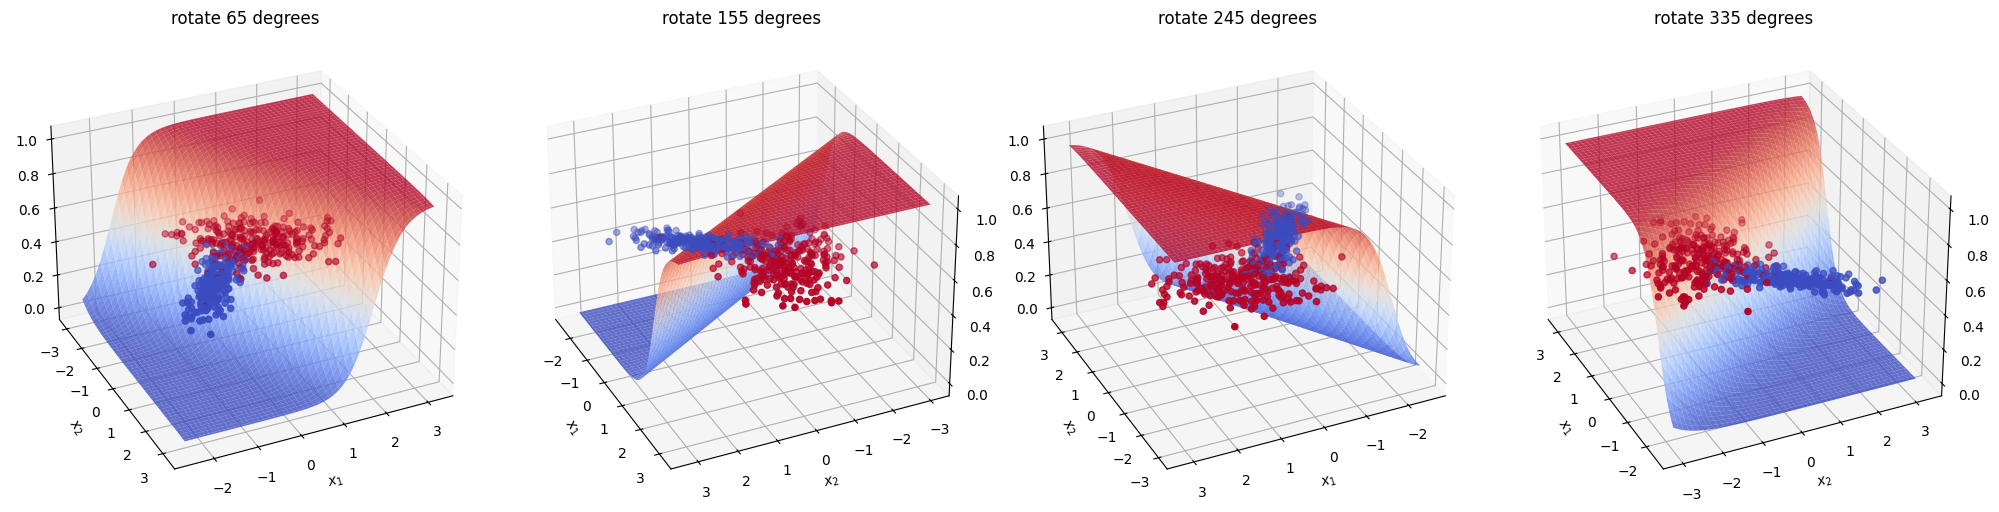

In [21]:
fig = plt.figure(figsize=(20, 5))

y_hat_boundary = sigmoid(b0 + D @ b)

for i in range(4):

    ax = fig.add_subplot(1, 4, i+1, projection='3d', computed_zorder=False)
    ax.plot_surface(xx, yy, y_hat_boundary.reshape(xx.shape), cmap='coolwarm', alpha=0.8)
    ax.view_init(30, i*90+65)
    ax.invert_xaxis()
    ax.scatter(X[:, 0], X[:, 1], np.zeros_like(X[:, 0])+0.5, c=Y, cmap='coolwarm')
    ax.set_xlabel(r"$x_1$")
    ax.set_ylabel(r"$x_2$")
    ax.set_title(f"rotate {i*90+65} degrees")

plt.tight_layout()

In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, penalty=None).fit(X, Y)

print("Sklearn gewichten:        ", log_reg.coef_.ravel(), log_reg.intercept_)
print("Do-it-yourself gewichten: ", b.ravel(), b0.ravel())

Sklearn gewichten:         [ 3.11150896 -2.00095664] [-0.03534455]
Do-it-yourself gewichten:  [ 3.35301562 -1.92532817] [0.00173172]


In [23]:
val_pred = log_reg.predict_proba(X_test)[:, 1][..., None]
val_error = -np.sum(y_val * np.log(val_pred) + (1-y_val) * np.log(1-val_pred))

print("Sklearn validation error:        ", val_error)
print("Do-it-yourself validation error: ", history.iloc[-1, 1])

Sklearn validation error:         19.587267168340297
Do-it-yourself validation error:  19.975279950150966


## Afstandsmetrieken

In [102]:
from sklearn.metrics import DistanceMetric

X = np.array([
    [1,3,2], 
    [2,5,1], 
    [3,7,5], 
    [4,5,8]
])
X

array([[1, 3, 2],
       [2, 5, 1],
       [3, 7, 5],
       [4, 5, 8]])

### Euclidean distance
$$
    d(\mathbf{a}, \mathbf{b}) = \sqrt{\sum_{i=1}^N (a_i - b_i)^2}
$$

In [108]:
# insert new dimension X[..., None]: shape (4, 3, 1)
# its transpose X[..., None].T: shape (1, 3, 4)
# broadcast: (4, 3, 1) - (1, 3, 4) = (4, 3, 4)
# sum over dimension one: (4, 3, 4) -> (4, 4)

np.sum((X[..., None] - X[..., None].T)**2, axis=(1))**0.5

array([[0.        , 2.44948974, 5.38516481, 7.        ],
       [2.44948974, 0.        , 4.58257569, 7.28010989],
       [5.38516481, 4.58257569, 0.        , 3.74165739],
       [7.        , 7.28010989, 3.74165739, 0.        ]])

In [109]:
dist = DistanceMetric.get_metric('euclidean')

dist.pairwise(X, X)

array([[0.        , 2.44948974, 5.38516481, 7.        ],
       [2.44948974, 0.        , 4.58257569, 7.28010989],
       [5.38516481, 4.58257569, 0.        , 3.74165739],
       [7.        , 7.28010989, 3.74165739, 0.        ]])

### Manhatten distance

$$
    d(\mathbf{a}, \mathbf{b}) = \sum_{i=1}^N |a_i - b_i|
$$

In [110]:
np.sum(np.abs(X[..., None] - X[..., None].T), axis=(1))

array([[ 0,  4,  9, 11],
       [ 4,  0,  7,  9],
       [ 9,  7,  0,  6],
       [11,  9,  6,  0]])

In [111]:
dist = DistanceMetric.get_metric('manhattan')
dist.pairwise(X, X)

array([[ 0.,  4.,  9., 11.],
       [ 4.,  0.,  7.,  9.],
       [ 9.,  7.,  0.,  6.],
       [11.,  9.,  6.,  0.]])

### Minkowski distance

$$
    d(\mathbf{a}, \mathbf{b}) = \left(\sum_{i=1}^N |a_i - b_i|^p\right)^{1/p}
$$
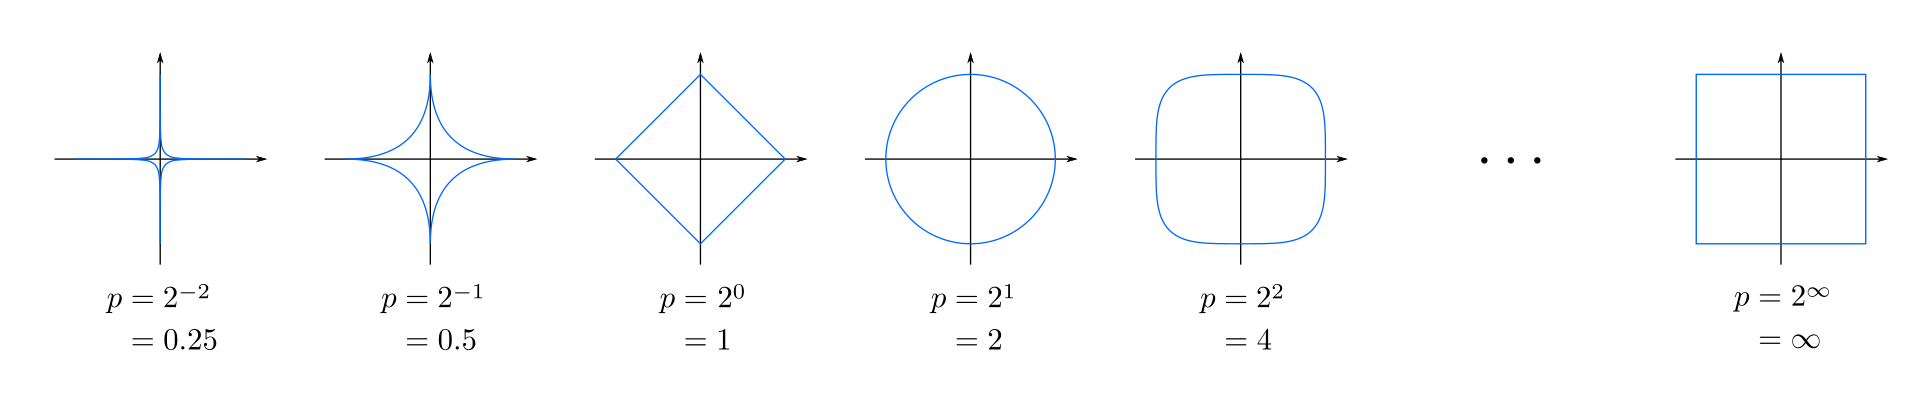
*bron: Wikipedia*

In [112]:
p = 2

np.sum(np.abs(X[..., None] - X[..., None].T)**p, axis=(1))**(1/p)

array([[0.        , 2.44948974, 5.38516481, 7.        ],
       [2.44948974, 0.        , 4.58257569, 7.28010989],
       [5.38516481, 4.58257569, 0.        , 3.74165739],
       [7.        , 7.28010989, 3.74165739, 0.        ]])

In [114]:
dist = DistanceMetric.get_metric('minkowski', p=10)
dist.pairwise(X, X)

array([[0.        , 2.00039028, 4.02234583, 6.00059583],
       [2.00039028, 0.        , 4.00039083, 7.00000254],
       [4.02234583, 4.00039083, 0.        , 3.0051673 ],
       [6.00059583, 7.00000254, 3.0051673 , 0.        ]])

## K-means clustering



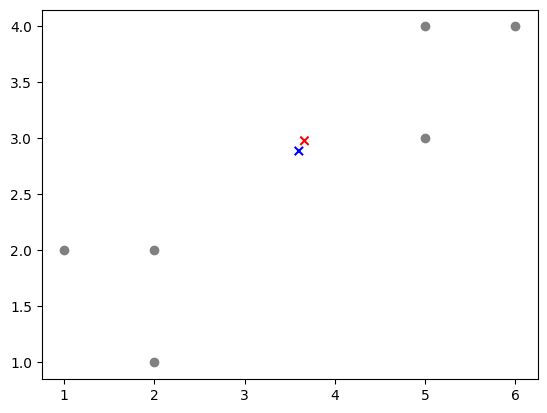

In [35]:
x = np.array([
    [1, 2],
    [2, 1],
    [2, 2],
    [5, 4],
    [5, 3],
    [6, 4],
])

# initial k means with 2 clusters
m1 = x.mean(axis=0) + np.random.normal(0, x.std()/x.shape[0], size=2)
m2 = x.mean(axis=0) + np.random.normal(0, x.std()/x.shape[0], size=2)
m = np.array([m1, m2])

plt.scatter(x[:, 0], x[:, 1], c='gray')
plt.scatter(m[:, 0], m[:, 1], c=['r', 'b'], marker='x')

K-means iteratief algoritme:

- gegeven input data $\text{x}$ met $N$ rijen en $d$ kolommen
- gegeven aantal clusters $k$

1. initialiseer clusters $\textbf{m} = [m_1, m_2, \dots, m_k]$ at random
2. initialiseer labels $b$ als een lege matrix met $N$ rijen en $k$ kolommen
3. maak een schatting van de labels $b$ op basis van $\textbf{m}$ met
$$
    b_{ti} = \begin{cases}
        1 & \text{if } ||\textbf{x}_t - \textbf{m}_i|| = \min_j ||\textbf{x}_t - \textbf{m}_j|| \\
        0 & \text{otherwise}
    \end{cases} \qquad \text{// zoek cluster $i$ met de kortste afstand tot $\textbf{x}_t$}
$$
4. maak een schatting van de nieuwe clusters 
$$
    \textbf{m}_i = \dfrac{\sum_t^N b_{ti} \textbf{x}_t}{\sum_t^N b_{ti}} \qquad \text{// gemiddelde (mean) van alle instanties die de cluster representeert}
$$
5. stop wanneer $\textbf{m}$ niet meer veranderd, en anders, ga naar stap 2 en herhaal

In [36]:
for _ in range(1): # n epochs

    # initialise labels (zero matrix with N rows and n_means columns)
    b = np.zeros((x.shape[0], m.shape[0]))

    for t, xt in enumerate(x):
        # compute euclidean distances from each xt to mi 
        dist = [np.linalg.norm(xt - mi) for mi in m]
        # take argmin i
        i = min(range(len(dist)), key=lambda x: dist[x])
        # update estimated labels
        b[t, i] = 1
            
    for i, mi in enumerate(m):
        # compute new estimates for means
        m[i] = np.sum((b[:, i, None] * x), axis=0) / np.sum(b[:, i])
b, m

(array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.]]),
 array([[5.33333333, 3.66666667],
        [1.66666667, 1.66666667]]))

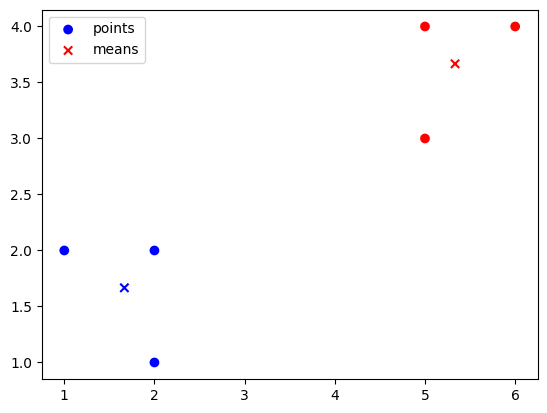

In [37]:
from matplotlib.colors import ListedColormap
cmap1 = ListedColormap(['red', 'blue'])

plt.scatter(x[:, 0], x[:, 1], c=b.argmax(axis=1), cmap=cmap1, label='points')
plt.scatter(m[:, 0], m[:, 1], c=['r', 'b'], marker='x', label='means')
plt.legend()

## Example 3: K-means clustering

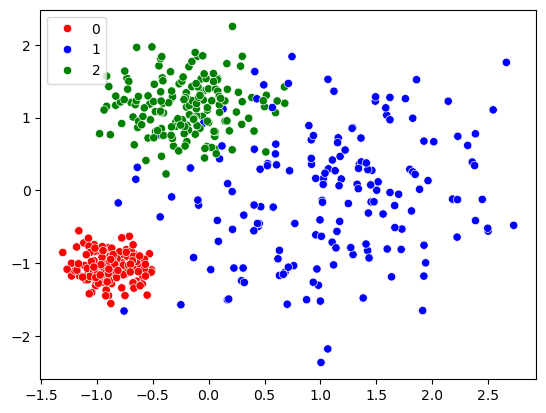

In [371]:
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap

rbg_cmap = ListedColormap(['red', 'blue', 'green'])

X, y = make_blobs(
    n_samples=500, 
    n_features=2,
    centers=[
        [-3, -4], 
        [8, 2], 
        [1, 9]
    ],
    cluster_std=[1, 5, 2]
)
X = (X - X.mean())/X.std()

xmin = X[:, 0].min(); xmax = X[:, 0].max()
ymin = X[:, 1].min(); ymax = X[:, 1].max()

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=rbg_cmap)

xx, yy = np.meshgrid(
    np.linspace(xmin-.5, xmax+.5, 100),
    np.linspace(ymin-.5, ymax+.5, 100)
)
D = np.vstack((xx.flatten(), yy.flatten())).T

c:\Users\janba\anaconda3\envs\workspace_jan\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


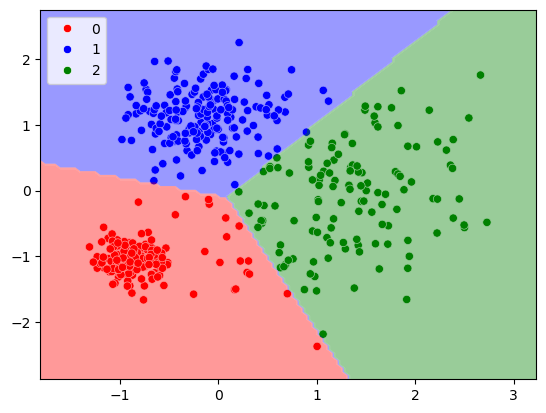

In [377]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init='auto').fit(X)
y_pred = kmeans.predict(X)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred, palette=rbg_cmap)

y_pred = kmeans.predict(D)
plt.contourf(xx, yy, y_pred.reshape(xx.shape), cmap=rbg_cmap, alpha=0.4, antialiased=True)